In [2]:
import turicreate as tc

# Load some house sales data

In [5]:
sales = tc.SFrame("home_data.sframe")
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Exploring the data for housing sales

In [6]:
tc.visualization.scatter(sales["sqft_living"], sales["price"], xlabel="sqft_living", ylabel="price")

# Create a simple regression model of sqft_living to price

In [68]:
train_data, test_data = sales.random_split(.8, seed=0)

## Build the regression model

In [8]:
sqft_model = tc.linear_regression.create(train_data, target="price", features=["sqft_living"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.009413     | 4338092.530134     | 2278495.663619       | 263816.338864                   | 245840.932591                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the simple model

In [9]:
print(test_data["price"].mean())

543054.0425632532


In [10]:
print(sqft_model.evaluate(test_data))

{'max_error': 4134653.0946186, 'rmse': 255223.68019462493}


# Show what our predictions look like

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

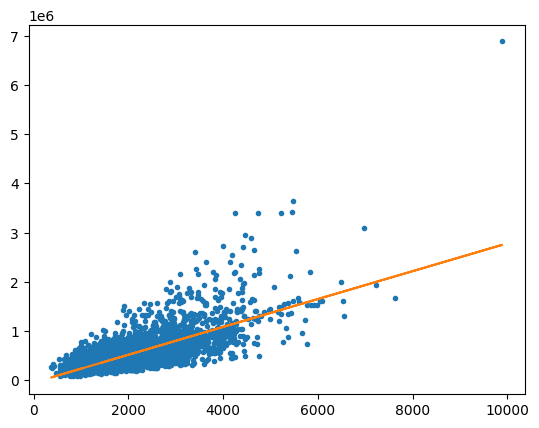

In [12]:
plt.plot(test_data["sqft_living"], test_data["price"], ".",
        test_data["sqft_living"], sqft_model.predict(test_data), "-")

In [13]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-49807.716265061754,5075.607703557384
sqft_living,None,283.1298909652641,2.229280841020135


# Explore other features in the data

In [18]:
my_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "zipcode"]

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [61]:
sales[my_features].show()

Materializing SFrame

In [40]:
tc.visualization.box_plot(sales["zipcode"], sales["price"])

# Build a regression model with more features

In [30]:
my_features_model = tc.linear_regression.create(train_data, target="price", features=my_features)
print(my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.090687     | 4102312.735301     | 1696885.421593       | 189132.828401                   | 191248.692110                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [22]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))

{'max_error': 4134653.0946186, 'rmse': 255223.68019462493}
{'max_error': 3143998.574820772, 'rmse': 180661.55188034897}


# Apply learned models to predict prices of 3 houeses

In [24]:
house1 = sales[sales["id"] == "5309101200"]

In [25]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house_images/house1.png">

In [26]:
print(house1["price"])

[620000.0, ... ]


In [27]:
print(sqft_model.predict(house1))

[629704.0220515721]


In [28]:
print(my_features_model.predict(house1))

[729550.8633176157]


## Prediction for a second, fancier house

In [31]:
house2 = sales[sales["id"] == "1925069082"]

In [32]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house_images/house2.jpg">

In [33]:
print(sqft_model.predict(house2))

[1263914.9778137635]


In [35]:
print(my_features_model.predict(house2))

[1228723.2370710839]


## Last house, super fancy

In [37]:
bill_gates = {"bedrooms":[8],
             "bathrooms":[25],
             "sqft_living":[50000],
             "sqft_lot":[225000],
             "floors":[4],
             "zipcode":["98039"],
             "condition":[10],
             "grade":[10],
             "waterfront":[1],
             "view":[4],
             "sqft_above":[37500],
             "sqft_basement":[12500],
             "yr_built":[1994],
             "yr_renovated":[2010],
             "lat":[47.627606],
             "long":[-122.242054],
             "sqft_living15":[5000],
             "sqft_lot15":[40000]}

<img src="house_images/bill_gates.png">

In [38]:
print(my_features_model.predict(tc.SFrame(bill_gates)))

[14938180.757928785]


In [39]:
print(sqft_model.predict(tc.SFrame(bill_gates)))

[14106686.831998143]


# Assignment

## Selection and summary statistics

In [47]:
highest_sales = sales[sales["zipcode"] == "98039"]
highest_sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000.0,4.0,3.5,4860.0,23885.0,2.0,0
2540700110,2015-02-12 00:00:00+00:00,1905000.0,4.0,3.5,4210.0,18564.0,2.0,0
3262300940,2014-11-07 00:00:00+00:00,875000.0,3.0,1.0,1220.0,8119.0,1.0,0
3262300940,2015-02-10 00:00:00+00:00,940000.0,3.0,1.0,1220.0,8119.0,1.0,0
6447300265,2014-10-14 00:00:00+00:00,4000000.0,4.0,5.5,7080.0,16573.0,2.0,0
2470100110,2014-08-04 00:00:00+00:00,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0
2210500019,2015-03-24 00:00:00+00:00,937500.0,3.0,1.0,1320.0,8500.0,1.0,0
6447300345,2015-04-06 00:00:00+00:00,1160000.0,4.0,3.0,2680.0,15438.0,2.0,0
6447300225,2014-11-06 00:00:00+00:00,1880000.0,3.0,2.75,2620.0,17919.0,1.0,0
2525049148,2014-10-07 00:00:00+00:00,3418800.0,5.0,5.0,5450.0,20412.0,2.0,0


In [48]:
highest_sales["price"].mean()

2160606.5999999996

In [51]:
sales_f = sales[(sales["sqft_living"] > 2000) & (sales['sqft_living'] <= 4000)]
sales_f

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
1736800520,2015-04-03 00:00:00+00:00,662500.0,3.0,2.5,3560.0,9796.0,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000.0,4.0,3.0,2950.0,5000.0,2.0,0
2524049179,2014-08-26 00:00:00+00:00,2000000.0,3.0,2.75,3050.0,44867.0,1.0,0
7137970340,2014-07-03 00:00:00+00:00,285000.0,5.0,2.5,2270.0,6300.0,2.0,0
3814700200,2014-11-20 00:00:00+00:00,329000.0,3.0,2.25,2450.0,6500.0,2.0,0
1794500383,2014-06-26 00:00:00+00:00,937000.0,3.0,1.75,2450.0,2691.0,2.0,0
1873100390,2015-03-02 00:00:00+00:00,719000.0,4.0,2.5,2570.0,7173.0,2.0,0
8562750320,2014-11-10 00:00:00+00:00,580500.0,3.0,2.5,2320.0,3980.0,2.0,0
0461000390,2014-06-24 00:00:00+00:00,687500.0,4.0,1.75,2330.0,5000.0,1.5,0


In [57]:
sales_f.num_rows()

9118

In [58]:
sales.num_rows()

21613

In [77]:
sales_f.num_rows()/sales.num_rows()

0.42187572294452413

## Building a model with advanced features

In [71]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [78]:
features_model = tc.linear_regression.create(train_data, target="price", features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.058806     | 4086543.315840     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [79]:
adv_features_model = tc.linear_regression.create(train_data, target="price", features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.057958     | 4336058.938754     | 162392.982703                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [80]:
print(features_model.evaluate(test_data))
print(adv_features_model.evaluate(test_data))

{'max_error': 3152242.7848689733, 'rmse': 180439.07296639978}
{'max_error': 3170363.1813858226, 'rmse': 155269.6579282571}


In [81]:
180439.07296639978 - 155269.6579282571

25169.415038142673